In [3]:
import numpy as np

from solvers import IHS, pCG, CG

# Generate synthetic, ill-conditioned data matrix

In [5]:
n = 4096
d = 200 
A = 1./np.sqrt(n)*np.random.randn(n,d)
u, _, v = np.linalg.svd(A, full_matrices=False)
sigma = np.array([0.99**ii for ii in range(d)])
A = u @ (np.diag(sigma) @ v)
xpl = 1./np.sqrt(d)*np.random.randn(d,)
b = A @ xpl + 1./np.sqrt(n)*np.random.randn(n,)

Initiate IHS, preconditioned-CG and CG solvers.

In [6]:
ihs = IHS(A, b, mode='evaluation')
cg = CG(A, b, mode='evaluation')
pcg = pCG(A, b, mode='evaluation')

# Experiments

In [80]:
import itertools
import matplotlib
params = {'legend.fontsize': '12',
          'axes.labelsize': '20',
          'axes.titlesize':'16',
          'xtick.labelsize':'18',
          'ytick.labelsize':'18',
          'text.usetex': True,
         }

matplotlib.rcParams.update(params)

linewidth=1.5
markeredgewidth=1.5
markersize=8.
alpha_tr=0.9


sketch size  1000

sketch size  1500

sketch size  2000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

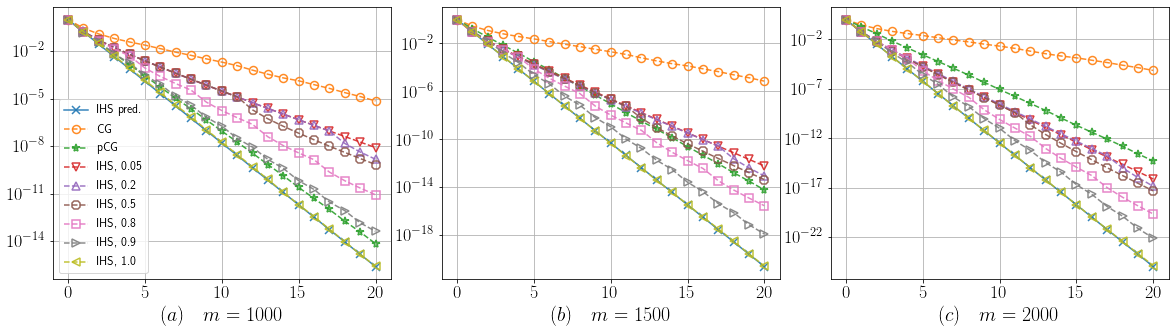

In [83]:
save = True

n_trials = 5
n_iterations = 20
freq_updates = np.array([0.05, 0.2, 0.5, 0.8, 0.9, 1.0])
sketch = 'srht'
algs = ['CG', 'pCG']
for freq_update in freq_updates:
    algs.append('IHS, '+str(freq_update))


f = plt.figure(figsize=(20,5.))


for ii, m in enumerate([1000, 1500, 2000]):
    
    print()
    print('sketch size ', m)
    
    errs = {}
    for alg in algs:
        errs[alg] = np.zeros((n_iterations+1, n_trials))
    markers = itertools.cycle(('x', 'o', '*', 'v', '^', '8', 's', '>', '<'))

    for trial in range(n_trials):
        _, _errs = cg.solve(n_iterations=n_iterations)
        errs['CG'][:, trial] = _errs
        _, _errs = pcg.solve(4*d, sketch=sketch, n_iterations=n_iterations)
        errs['pCG'][:, trial] = _errs
        for freq_update in freq_updates:
            _freq = int((1-freq_update)*n_iterations) + 1
            _, th_errors, _errs = ihs.solve(m, sketch=sketch, n_iterations=n_iterations, freq_update=_freq)
            errs['IHS, '+str(freq_update)][:, trial] = _errs
            
    ax = f.add_subplot(1, 3, ii+1)
    ax.plot(range(n_iterations+1), th_errors, 
             marker=next(markers), fillstyle='none', linewidth=linewidth, markeredgewidth=markeredgewidth,
             markersize=markersize, alpha=alpha_tr, label='IHS pred.')
    
    for name in errs:
        ax.plot(range(n_iterations+1), np.mean(errs[name], axis=1), 
                marker=next(markers), fillstyle='none', linewidth=linewidth, markeredgewidth=markeredgewidth,
                markersize=markersize, linestyle='--', alpha=alpha_tr, label=name)
    
    if ii==0:
        ax.legend()
        ax.set_xlabel(r'$(a)\quad m=1000$')
    elif ii==1:
        ax.set_xlabel(r'$(b)\quad m=1500$')
    elif ii==2:
        ax.set_xlabel(r'$(c)\quad m=2000$')
        
    ax.set_yscale('log')
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.grid(which='both')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.15)

if save:
    plt.savefig('./comparison_pcg_ihsskip.eps', bbox_inches='tight')
    plt.savefig('./comparison_pcg_ihsskip.png', bbox_inches='tight')

plt.show()   
